#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Eduardo Espinosa A. </font>

##### <font color="#03997A"> Modulo 7 Aprendizaje de Maquina NO supervisado </font>

##### <font color="#03997A"> Tema 4 Agrupamiento con el método Reglas de Asociación Alumno: Ibarra Ramírez Sergio </font>

Vamos a definir nuestros datos

In [1]:
my_basket=[['bread','butter','wine','bananas','coffee','carrots'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['beer','chips','asparagus','salsa','milk','apples'],
           ['olive oil','bread','butter','tomatoes','steak','carrots'],
           ['tomatoes','onions','chips','wine','ketchup','orange juice'],
           ['bread','butter','beer','chips','milk'],
           ['butter','tomatoes','carrots','coffee','sugar'],
           ['tomatoes','onions','cheese','milk','potatoes'],
           ['bread','butter','ketchup','coffee','chicken wings'],
           ['butter','beer','chips','asparagus','apples'],
           ['tomatoes','onion','beer','chips','milk','coffee']]

## En donde i será cada una de las filas 
## Z será todos aquellos (todas aquellas finlas) donde se encuentre la combinación definida  (en este caso bread-butter)

[all(z in i for z in ['butter', 'bread']) for i in my_basket]

[True, False, False, True, False, True, False, False, True, False, False]

Vamos a escribir una función para obtener frecuencias de items

In [2]:
def frecuencias(x,y):
    ##Lista de 1 para x si aparece True en frecuencia 
    fx_ = sum([x in i for i in my_basket])
    fy_ = sum([y in i for i in my_basket])
    fxy_ = sum([all(z in  i for z in (x,y))for i in my_basket])

    ## Definamos el support 
    support = fxy_ /len(my_basket)
    confidence = support / (fx_/len(my_basket))
    lift = confidence / (fy_/len(my_basket))


    print ('Support = {}'.format(round(support,2)))
    print ('Confidence = {}'.format(round(confidence,2)))
    print ('Lift = {}'.format(round(lift,2)))

El **soporte** indica la probabilidad de que x,y aparezcan juntos en una nota del total de notas de nuestro universo analizado

La **confianza** nos indica que tanto cuando aparece el antecedente determinado, aparece el consecuente, por ejemplo aqui siempre que aparece pan, aparece mantequilla, aunque alreves no es así 

Si **LIFT** es mayor que uno indica que es altamente probable que ambos (antecedente y consecuente determinado) aparezcan juntos

In [3]:
frecuencias('butter', 'bread')

Support = 0.36
Confidence = 0.67
Lift = 1.83


#### Aplicación del algoritmo apriori 

In [4]:
import numpy as np 
import pandas as pd 

groceries = pd.read_csv("http://dicyg.fi-c.unam.mx:8080/lalo/pypcd/presentaciones/groceries.csv", sep=";")
groceries

,ID,Transaction
0,0,"milk,bread,biscuit"
1,1,"bread,milk,biscuit,cereal"
2,2,"bread,tea"
3,3,"jam,bread,milk"
4,4,"tea,biscuit"
5,5,"bread,tea"
6,6,"tea,cereal"
7,7,"bread,tea,biscuit"
8,8,"jam,bread,tea"
9,9,"bread,milk"


In [6]:
### Biblioteca adicional para ML 
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori, association_rules

Apply es para aplicar a cada elemento de la lista transactions, una función que en este caso es la sorted para definir las transacciones de nuestra tabla de groceries

In [9]:
## Vamos a separar cada transacción como una lista
transactions = list(groceries['Transaction'].apply(lambda x: sorted(x.split(','))))
transactions


[['biscuit', 'bread', 'milk'],
 ['biscuit', 'bread', 'cereal', 'milk'],
 ['bread', 'tea'],
 ['bread', 'jam', 'milk'],
 ['biscuit', 'tea'],
 ['bread', 'tea'],
 ['cereal', 'tea'],
 ['biscuit', 'bread', 'tea'],
 ['bread', 'jam', 'tea'],
 ['bread', 'milk'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['biscuit', 'cereal', 'coffee', 'orange'],
 ['coffee', 'sugar'],
 ['bread', 'coffee', 'orange'],
 ['biscuit', 'bread', 'sugar'],
 ['cereal', 'coffee', 'sugar'],
 ['biscuit', 'bread', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['bread', 'coffee', 'sugar'],
 ['cereal', 'coffee', 'milk', 'tea']]

Vamos a usar TransactionEncoder para obtener la matriz binaria 

In [10]:
encoder = TransactionEncoder().fit(transactions)
onehot = encoder.transform(transactions)
onehot

array([[ True,  True, False, False, False,  True, False, False, False],
       [ True,  True,  True, False, False,  True, False, False, False],
       [False,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True,  True, False, False, False],
       [ True, False, False, False, False, False, False, False,  True],
       [False,  True, False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False, False,  True],
       [ True,  True, False, False, False, False, False, False,  True],
       [False,  True, False, False,  True, False, False, False,  True],
       [False,  True, False, False, False,  True, False, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [ True, False,  True,  True, False, False,  True, False, False],
       [False, False, False,  True, False, False, False,  True, False],
       [False,  True, False,  True, False, False,  True, False, 

In [11]:
## Convertir el objeto onehot a un DataFrame 

onehot = pd.DataFrame(onehot, columns=encoder.columns_)
onehot

,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
0,True,True,False,False,False,True,False,False,False
1,True,True,True,False,False,True,False,False,False
2,False,True,False,False,False,False,False,False,True
3,False,True,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,True
5,False,True,False,False,False,False,False,False,True
6,False,False,True,False,False,False,False,False,True
7,True,True,False,False,False,False,False,False,True
8,False,True,False,False,True,False,False,False,True
9,False,True,False,False,False,True,False,False,False


In [14]:
## Obtenemos el frequent itemset con ayuda del algoritmo apriori 

## Mandamos a allamar al algoritmo apriori sobre un conjunto de datos 
freq_items = apriori(onehot, min_support=0.01, max_len=3, use_colnames=True)
freq_items.tail(10)

,support,itemsets
44,0.05,"(orange, bread, coffee)"
45,0.10,"(sugar, bread, coffee)"
46,0.05,"(milk, jam, bread)"
47,0.05,"(tea, jam, bread)"
48,0.05,"(milk, cereal, coffee)"
49,0.10,"(orange, cereal, coffee)"
50,0.05,"(sugar, cereal, coffee)"
51,0.05,"(tea, cereal, coffee)"
52,0.05,"(milk, tea, cereal)"
53,0.05,"(milk, tea, coffee)"


In [15]:
## Generar las reglas de asociación 

## Recordar que en el caso de lift con mayor a 1.0 ya se consideaba que habia una alta probabilidad de que amos productos fueran adquirtidos juntos
rules = association_rules(freq_items, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000
4,(orange),(biscuit),0.15,0.40,0.10,0.666667,1.666667,0.0400,1.800000,0.470588
...,...,...,...,...,...,...,...,...,...,...
111,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211
112,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474
113,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500,1.000000
114,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000


Vamos a filtrar aquellas reglas que tengan como antecedente 2 elementos y cuyo lift sea alto 

In [16]:
## Vamos a filtrar aquellas reglas que tengan como antecedente 2 elementos y cuyo lift sea alto 

## Vamos a agregar una columna a nuestro data.Frame

## Para contar cuantos antecedentes hay en cada row
rules['lhs_items'] = rules.antecedents.apply(lambda x:len(x))

## Vamos a filtrar columnas de un data frame como dataFrame[dataFrame['Columna'] condicion ]
rules[rules['lhs_items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
60,"(biscuit, coffee)",(orange),0.10,0.15,0.10,1.000000,6.666667,0.0850,inf,0.944444,2
54,"(cereal, biscuit)",(orange),0.15,0.15,0.10,0.666667,4.444444,0.0775,2.55,0.911765,2
112,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
64,"(cereal, bread)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2
104,"(milk, tea)",(cereal),0.05,0.30,0.05,1.000000,3.333333,0.0350,inf,0.736842,2


In [17]:
## Ahora ordenados por confidence
rules[rules['lhs_items']>1].sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
26,"(cereal, bread)",(biscuit),0.05,0.40,0.05,1.0,2.500000,0.0300,inf,0.631579,2
58,"(orange, biscuit)",(coffee),0.10,0.40,0.10,1.0,2.500000,0.0600,inf,0.666667,2
111,"(milk, coffee)",(tea),0.05,0.35,0.05,1.0,2.857143,0.0325,inf,0.684211,2
110,"(milk, tea)",(coffee),0.05,0.40,0.05,1.0,2.500000,0.0300,inf,0.631579,2
104,"(milk, tea)",(cereal),0.05,0.30,0.05,1.0,3.333333,0.0350,inf,0.736842,2


Vamos ahora a generar un heat map del resultado de las reglas de asociación 
Primero concatenamos los prductos antecedents y consequents 

In [21]:
## Generar un heatmmap del resultado de las reglas de asociación 

import seaborn as sns 

## Agregamos columnas concatenado los nombres de los productos 
## Vamos a crear una nueva columna llamada antecedentes_ 

rules['antecedentes_'] = rules.antecedents.apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules.consequents.apply(lambda a: ','.join(list(a)))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items,antecedentes_,consequents_
0,(cereal),(biscuit),0.30,0.40,0.15,0.500000,1.250000,0.0300,1.200000,0.285714,1,cereal,biscuit
1,(biscuit),(cereal),0.40,0.30,0.15,0.375000,1.250000,0.0300,1.120000,0.333333,1,biscuit,cereal
2,(milk),(biscuit),0.25,0.40,0.10,0.400000,1.000000,0.0000,1.000000,0.000000,1,milk,biscuit
3,(biscuit),(milk),0.40,0.25,0.10,0.250000,1.000000,0.0000,1.000000,0.000000,1,biscuit,milk
4,(orange),(biscuit),0.15,0.40,0.10,0.666667,1.666667,0.0400,1.800000,0.470588,1,orange,biscuit
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,"(milk, coffee)",(tea),0.05,0.35,0.05,1.000000,2.857143,0.0325,inf,0.684211,2,"milk,coffee",tea
112,"(tea, coffee)",(milk),0.05,0.25,0.05,1.000000,4.000000,0.0375,inf,0.789474,2,"tea,coffee",milk
113,(milk),"(tea, coffee)",0.25,0.05,0.05,0.200000,4.000000,0.0375,1.187500,1.000000,1,milk,"tea,coffee"
114,(tea),"(milk, coffee)",0.35,0.05,0.05,0.142857,2.857143,0.0325,1.108333,1.000000,1,tea,"milk,coffee"


Valores mayores a 1 undican de nuevo alta probabilidad, pero NO es cierto que entre más grande el valor sea indica más probabilidad 

In [25]:
pivot = rules[rules.lhs_items>1].pivot(index='antecedentes_', 
                                         columns='consequents_',
                                        values= 'confidence')
pivot
                                          

consequents_,biscuit,bread,cereal,coffee,jam,milk,orange,sugar,tea
antecedentes_,,,,,,,,,
"biscuit,bread",NaN,NaN,NaN,NaN,NaN,0.400000,NaN,0.400000,NaN
"biscuit,coffee",NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
"bread,coffee",NaN,NaN,NaN,NaN,NaN,NaN,0.333333,0.666667,NaN
"cereal,biscuit",NaN,NaN,NaN,0.666667,NaN,0.333333,0.666667,NaN,NaN
"cereal,bread",1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
"cereal,coffee",0.500000,NaN,NaN,NaN,NaN,0.250000,0.500000,NaN,NaN
"jam,bread",NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,0.5
"milk,biscuit",NaN,1.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
"milk,bread",0.500000,NaN,NaN,NaN,0.25,NaN,NaN,NaN,NaN


Vamos ahora si a graficar el resultado (en este caso del lift) en un heatmap 

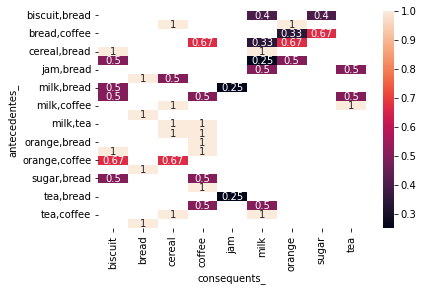

In [26]:
sns.heatmap(pivot, annot=True)
import matplotlib.pyplot as plt 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()